<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/excercise/calculationofphaseenvelopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Natural Gas Fluid:

   ComponentName  MolarComposition[-]
0       nitrogen             1.179900
1            CO2             0.510200
2        methane            95.330300
3         ethane             2.110200
4        propane             0.321700
5       i-butane             0.127800
6       n-butane             0.084600
7      i-pentane             0.069400
8      n-pentane             0.034000
9         2-m-C5             0.033500
10        3-m-C5             0.010900
11      n-hexane             0.018100
12       benzene             0.001700
13      c-hexane             0.006610
14     n-heptane             0.002070
15       toluene             0.004500
16          c-C7             0.005300
17      n-octane             0.006100
18      m-Xylene             0.003300
19          c-C8             0.000103
20      n-nonane             0.000320
21          nC10             0.000400
                          total         gas                       
           nitrogen  1.18154E-2  1.1815

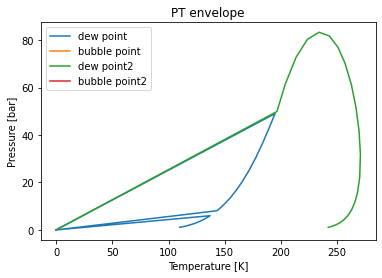

cricoP  83.3163022035517   [bara]   cricoT  233.96012927328314  °C
                          total         gas          oil                     
           nitrogen  1.18154E-2  1.18165E-2   3.70138E-4      [mole fraction]
                CO2   5.1091E-3   5.1093E-3   3.03781E-3      [mole fraction]
            methane   9.5463E-1  9.54712E-1   1.10392E-1      [mole fraction]
             ethane  2.11314E-2  2.11314E-2   2.11119E-2      [mole fraction]
            propane  3.22148E-3  3.22043E-3   1.40749E-2      [mole fraction]
           i-butane  1.27978E-3  1.27844E-3    1.5054E-2      [mole fraction]
           n-butane  8.47178E-4  8.45705E-4   1.60414E-2      [mole fraction]
          i-pentane  6.94966E-4  6.91439E-4   3.70978E-2      [mole fraction]
          n-pentane  3.40473E-4  3.37989E-4   2.59756E-2      [mole fraction]
             2-m-C5  3.35466E-4  3.29281E-4   6.41738E-2      [mole fraction]
             3-m-C5  1.09152E-4  1.06792E-4   2.44588E-2      [mole fractio

In [20]:
from neqsim.thermo import fluid_df, TPflash, phaseenvelope,printFrame,dewt
import pandas as pd


naturalgas = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane","i-pentane", "n-pentane","2-m-C5", "3-m-C5", "n-hexane", "benzene", "c-hexane", "n-heptane", "toluene", "c-C7", "n-octane", "m-Xylene", "c-C8", "n-nonane", "nC10"], 
       'MolarComposition[-]':  [1.1799,0.5102,95.3303,2.1102,0.3217,0.1278,0.0846,0.0694,0.0340,0.0335,0.0109,0.0181,0.0017,0.00661,0.00207,0.0045,0.00530,0.0061,0.0033,0.000103,0.00032,0.0004]
} 


naturalgasdf = pd.DataFrame(naturalgas) 
print("Natural Gas Fluid:\n")
print(naturalgasdf.head(30).to_string())

naturalgasFluid = fluid_df(naturalgasdf)#.setModel("UMR-PRU-EoS")
naturalgasFluid.autoSelectMixingRule()
TPflash(naturalgasFluid)
printFrame(naturalgasFluid)

gasPhaseEnvelope = phaseenvelope(naturalgasFluid,True)
cricobar = gasPhaseEnvelope.get("cricondenbar")
print("cricoP ",  cricobar[1], "  [bara] ", " cricoT ", cricobar[0], " °C")



naturalgasFluid.setTemperature(-10.0, "C")
naturalgasFluid.setPressure(21.0, "bara")
TPflash(naturalgasFluid)
printFrame(naturalgasFluid)


naturalgasFluid.setPressure(21.0, "bara")
dewPointT =dewt(naturalgasFluid)-273.15
print("dew point T ", dewPointT, " °C")

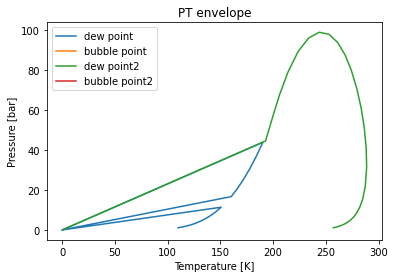

cricoP  98.91668850030412   [bara]   cricoT  243.7025511923998  °C


In [21]:
#Method to change fluid composition
fluidComposition(naturalgasFluid, [1.1799,0.5102,92.3303,2.1102,0.3217,0.1278,0.0846,0.0694,0.340,0.0335,0.109,0.0181,0.0017,0.00661,0.00207,0.0045,0.00530,0.0061,0.0033,0.000103,0.00032,0.004])

gasPhaseEnvelope = phaseenvelope(naturalgasFluid,True)
cricobar = gasPhaseEnvelope.get("cricondenbar")
print("cricoP ",  cricobar[1], "  [bara] ", " cricoT ", cricobar[0], " °C")